<a href="https://colab.research.google.com/github/ananyatiwari2709/Food-Service-Database/blob/main/Festive_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING MODULES AND DATA CLEANING**

In [2]:
#Importing python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #directly shows the plot without plt.show()
import seaborn as sns

In [4]:
#Storing the csv file into the dataframe
df = pd.read_csv('/content/Festive Sales Data.csv', encoding = 'unicode_escape')
#to avoid encoding error, using 'unicode escape'

In [14]:
df.shape
#outputs no. of rows and columns

(11251, 13)

In [ ]:
df.head()
#shows top 5 rows(by default) of data file.

In [ ]:
# DATA CLEANING

df.info()

In [ ]:
#droping blank coloumns, inplace parameter true makes permanent change in dataframe.
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [ ]:
df.isnull()
#just shows true if there is null value else false

In [ ]:
df.isnull().sum()
#will show the total no. of null values in an attribute

In [22]:
df.dropna(inplace=True)
#dropping the null values permanently

In [24]:
#Change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes
#shows the datatype of column

In [30]:
df.columns
#shows all the column names

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#renaming column
df.rename(columns = {'Marital_Status' : 'Married'})
#will not permanently change as inplace parameter is not true and '=' operator not used. NOTE : Passed as a dictionary

In [ ]:
#describe method returns description of data in dataframe (count, mean, std, min, max, etc )
df.describe()

In [ ]:
#use describe() for specific column
df[['Age','Orders','Amount']].describe()

**EXPLORATORY DATA ANALYSIS**

**Gender**

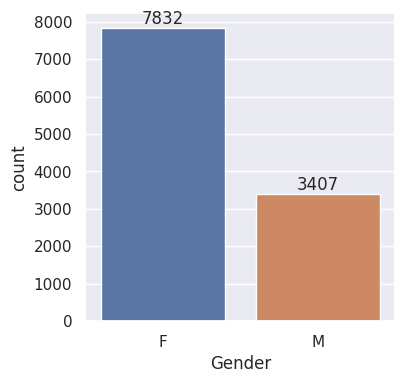

In [89]:
ax = sns.countplot(x='Gender', data = df)  #plotting bar graph
for bars in ax.containers:       #labelling the bars
  ax.bar_label(bars)

In [45]:
#List of amount spend by male and female : groupby method
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

,Gender,Amount
0,F,74335853
1,M,31913276


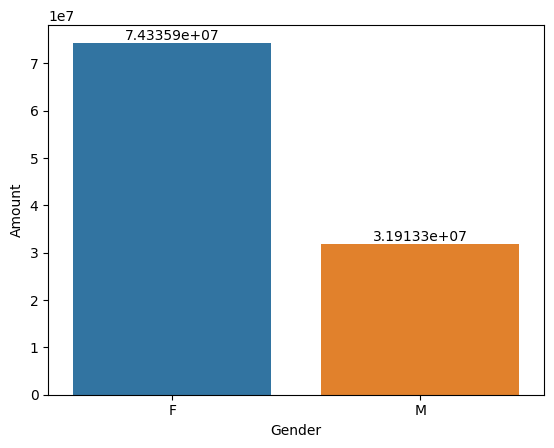

In [49]:
#Total Amount Vs Gender
ax = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen) #plotting
for bars in ax.containers:       #labelling the bars
  ax.bar_label(bars)

From above graphs we can see that most of the buyers are female and even the purchasing power of female are greater than male.

**Age**

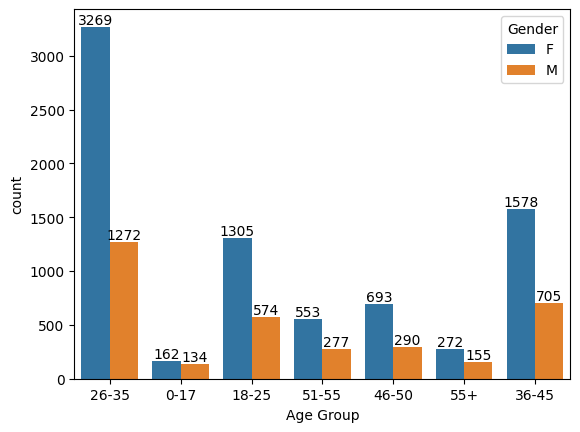

In [50]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender') #hue means plot will be bifurgated on the basis of gender.
for bars in ax.containers:
  ax.bar_label(bars)

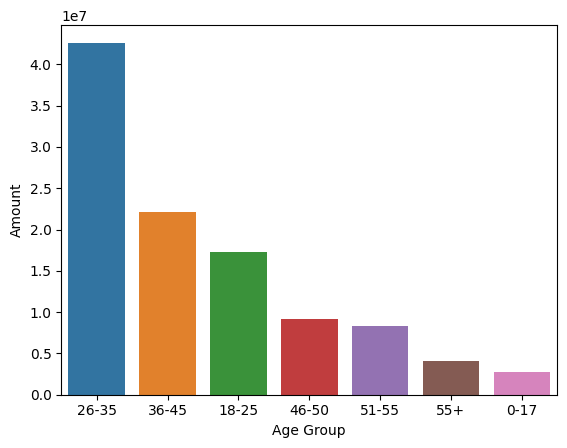

In [54]:
#Total Amount Vs Age Group
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)
ax = sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age) #plotting

From above graphs we can see that most of the buyers are females of age group 26-35 years.

**State**

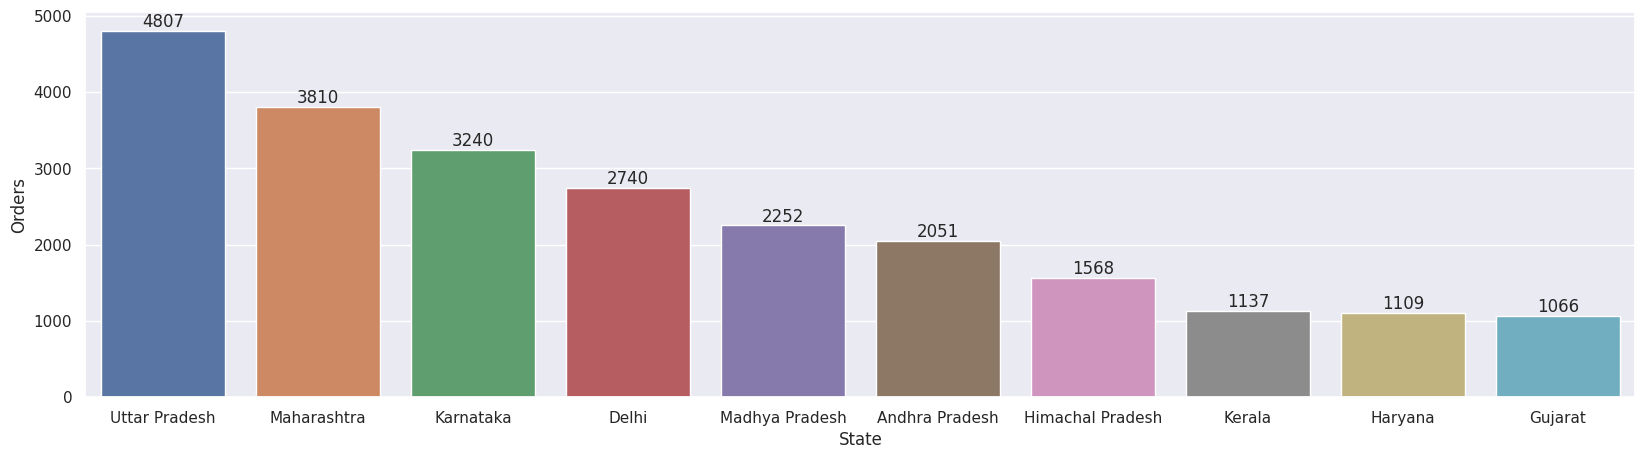

In [71]:
#Total no. of orders from top 10 States.
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})  #size of bars
ax = sns.barplot(data=sales_state, x='State', y='Orders') #plotting
for bars in ax.containers:    #labelling
  ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

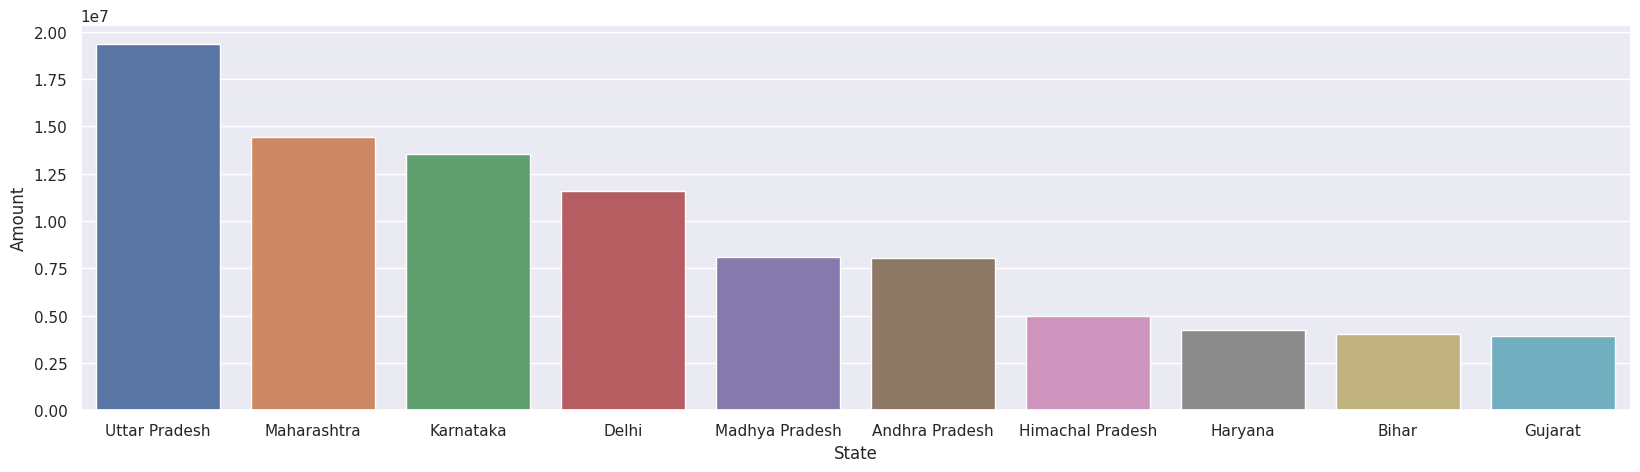

In [91]:
#Total amount spent by top 5 States.
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='State', y='Amount')

From the above graphs we can see that most of the orders and sales are from UP, Maharashtra and Karnatka respectively.

**Marital Status**

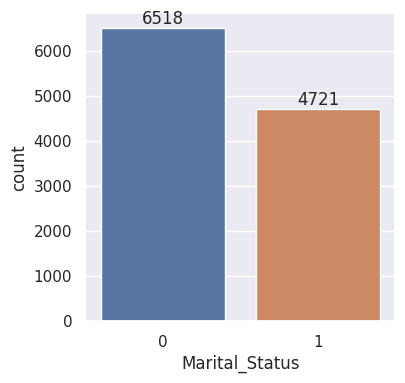

In [88]:
ax = sns.countplot(x='Marital_Status', data = df)  #plotting bar graph
sns.set(rc={'figure.figsize':(4,4)})
for bars in ax.containers:       #labelling the bars
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

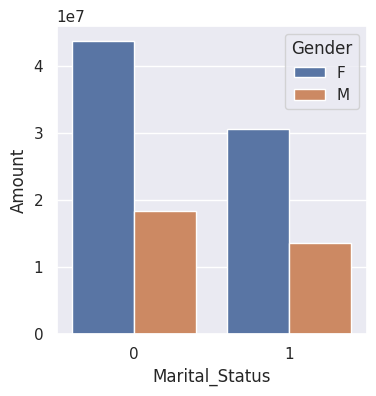

In [87]:
#Total amount spent Vs Marital Status.
sales_mar = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=sales_mar, x='Marital_Status', y='Amount', hue = 'Gender')

From above graphs we can see that most of the buyers are married women.

**Occupation**

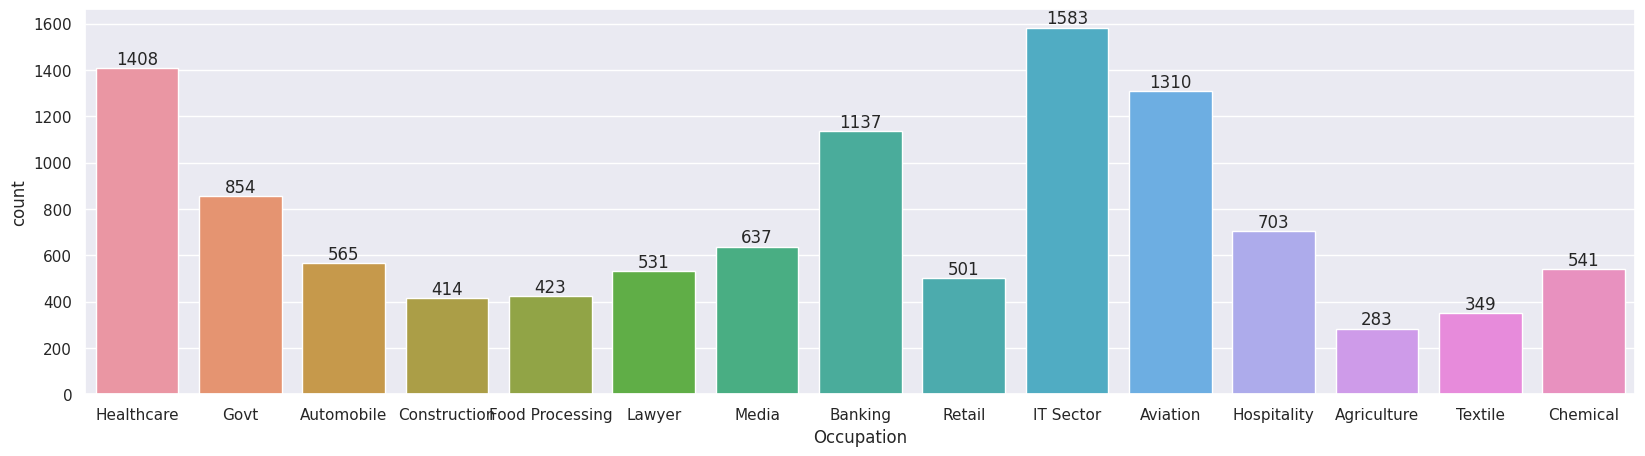

In [94]:
sns.set(rc={'figure.figsize':(20,5)}) #size
ax = sns.countplot(x='Occupation', data = df)  #plotting bar graph
for bars in ax.containers:       #labelling the bars
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

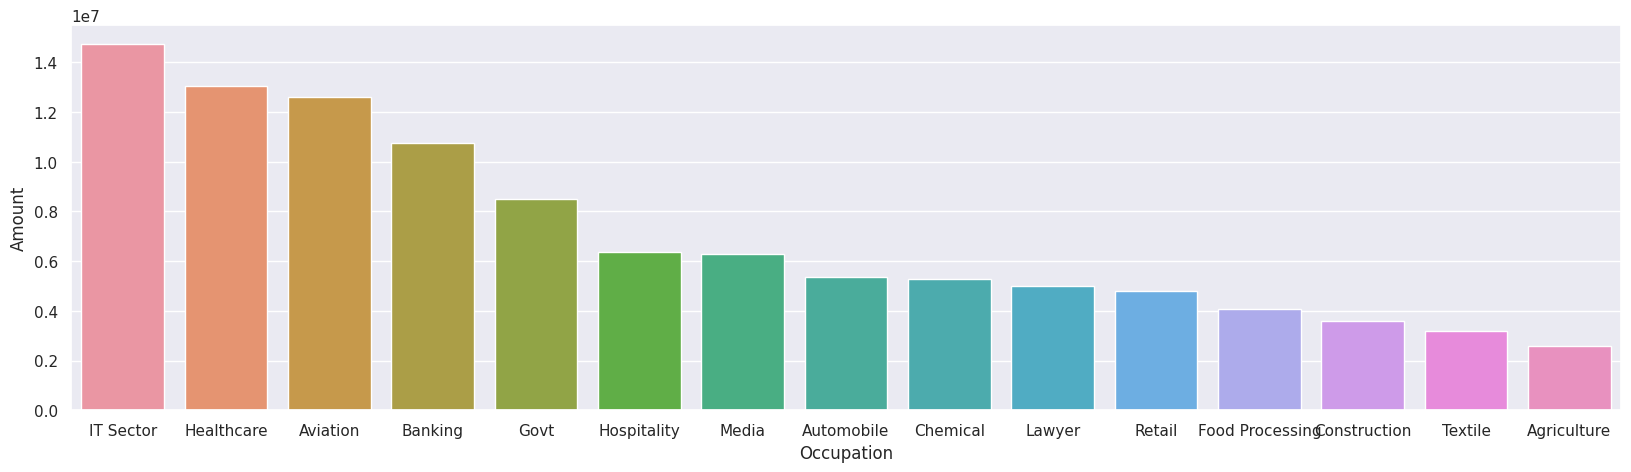

In [96]:
#Total amount spent by top 5 Occupations.
sales_state = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare, Aviation sector respectively.

**Product Category**

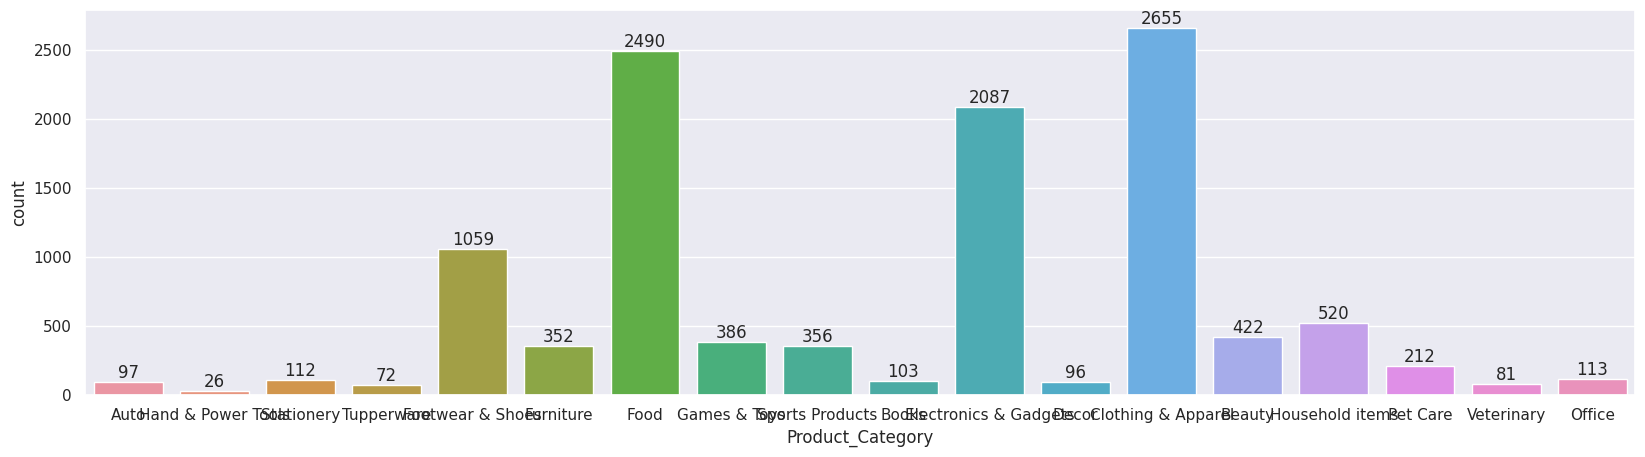

In [95]:
sns.set(rc={'figure.figsize':(20,5)}) #size
ax = sns.countplot(x='Product_Category', data = df)  #plotting bar graph
for bars in ax.containers:       #labelling the bars
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

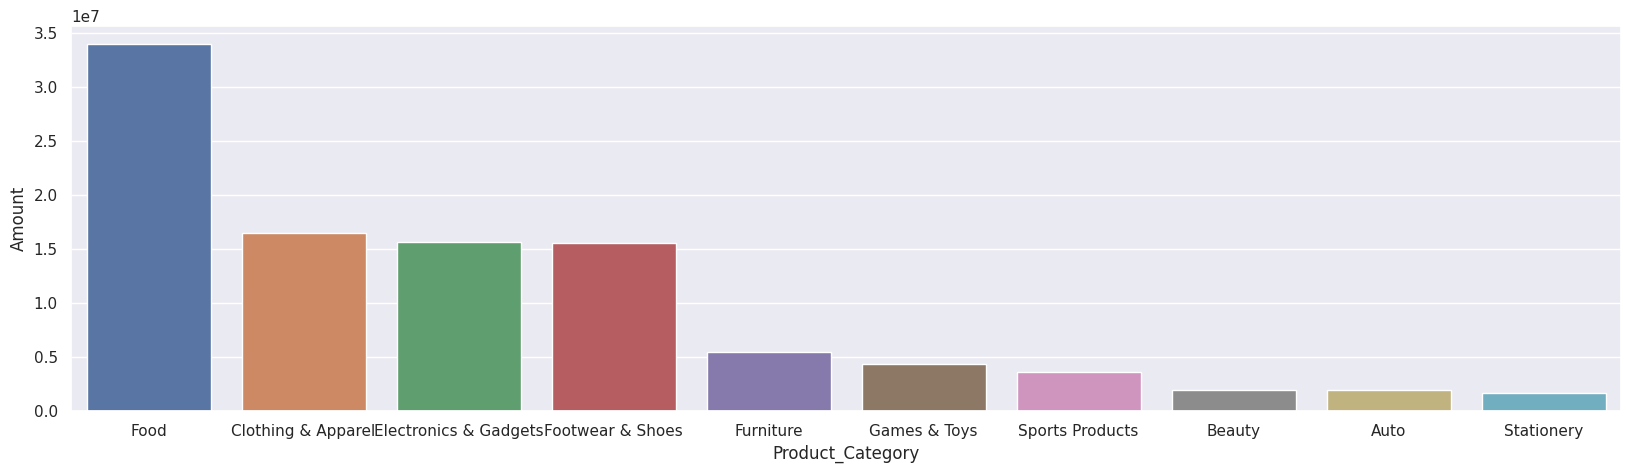

In [97]:
#Total amount spent on top 10 Prodcut Category.
sales_state = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

From above graphs we can see that most of the sold products are from food, clothing, electronics category respectively.

**Product ID**

<Axes: xlabel='Product_ID', ylabel='Orders'>

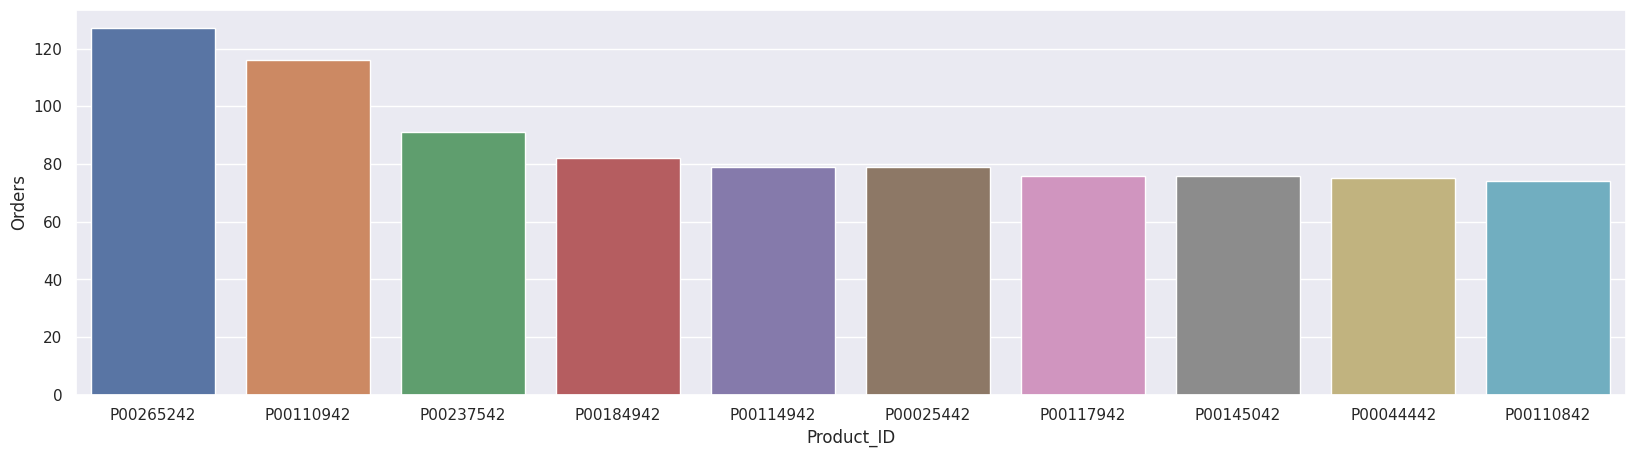

In [104]:
#Top 10 selling Products
sales_state = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Product_ID', y='Orders')

**CONCLUSION**

Married women of age group 26-35 years from UP, Maharashtra and Karnatka working in IT, Healthcare and Aviation sector are more likely to buy products from Food, clothing and electronics category.